# Theoretical

---



# Q1. Can we use Bagging for regression problems?

Yes, **Bagging (Bootstrap Aggregating)** can be effectively used for **regression problems**.

## ✅ Why Bagging Works for Regression:
- Bagging involves training multiple models (like Decision Trees) on different random subsets (with replacement) of the dataset.
- For **regression**, the predictions of all models are **averaged** to get the final output.
- This helps in **reducing variance** without increasing bias, improving the overall model stability.

## 🧠 Common Bagging Algorithm for Regression:
- `BaggingRegressor` from **scikit-learn**:
```python
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Sample dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bagging Regressor with Decision Trees
model = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


# Q2. What is the difference between multiple model training and single model training?

# 🧠 Difference Between Single Model Training and Multiple Model Training

Understanding the distinction between training a single model vs. an ensemble of models is crucial in machine learning.

---

## ✅ Single Model Training
- **Definition**: Training one model (e.g., Decision Tree, SVM, Linear Regression) on the entire dataset.
- **Workflow**:
  - One model → Trained on the full training set.
  - One prediction path for any input.
- **Pros**:
  - Simpler, faster to train.
  - Easier to interpret and debug.
- **Cons**:
  - Prone to **overfitting** or **underfitting**.
  - Performance is limited by the capacity of that single model.

---

## ✅ Multiple Model Training (Ensemble Learning)
- **Definition**: Training several models (e.g., Bagging, Boosting, Stacking) and combining their predictions.
- **Workflow**:
  - Multiple models → Each trained on different parts or aspects of data.
  - Predictions are **aggregated** (average, vote, or meta-model).
- **Pros**:
  - Improves **accuracy**, **generalization**, and **robustness**.
  - Reduces variance (Bagging), bias (Boosting), or both (Stacking).
- **Cons**:
  - More complex, slower to train.
  - Harder to interpret (especially black-box ensembles).

---

## 🔁 Summary Table

| Feature                  | Single Model              | Multiple Models (Ensemble)          |
|--------------------------|---------------------------|--------------------------------------|
| 🔍 Simplicity            | Simple to implement       | More complex setup                  |
| 🚀 Speed                 | Fast training/prediction  | Slower due to multiple models       |
| 🎯 Accuracy              | May underperform          | Usually more accurate               |
| 📉 Overfitting Risk      | Higher (esp. complex models) | Lower (especially with bagging)    |
| 🧠 Interpretability      | High                      | Often low                           |

---

> ✅ **Conclusion**: Use single models for simplicity and quick solutions. Choose multiple models (ensembles) for better accuracy and reliability in complex tasks.


# Q3. Explain the concept of feature randomness in Random Forest?

# 🌲 Feature Randomness in Random Forest

## 🔍 What is Random Forest?
Random Forest is an ensemble learning method that builds multiple decision trees and merges their results to improve accuracy and control overfitting.

---

## 🎲 What is Feature Randomness?

**Feature randomness** refers to the **random selection of a subset of features** at each split when building individual decision trees in a Random Forest.

---

### ✅ Key Concepts:

- At each node in a tree, only a **random subset of features** (not all features) is considered for the best split.
- This is in contrast to a standard decision tree where **all features** are considered at each split.

---

## 🔍 Why Use Feature Randomness?

| Purpose | Explanation |
|--------|-------------|
| 🌳 **Tree Diversity** | Different trees look at different features, reducing correlation between them. |
| 📉 **Lower Overfitting** | Less reliance on strong predictors helps generalize better. |
| 🚀 **Faster Computation** | Only a subset of features is evaluated at each split, reducing training time. |

---

## 📐 Parameters Controlling Feature Randomness:

- **For classification**: `max_features = sqrt(n_features)`
- **For regression**: `max_features = n_features / 3`

You can set this using `max_features` in `RandomForestClassifier` or `RandomForestRegressor` in `scikit-learn`.

```python
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)


# Q4. What is OOB (Out-of-Bag) Score?

## 🌲 Background:
Random Forest uses **Bagging** (Bootstrap Aggregation), where each decision tree is trained on a **random sample with replacement** from the original dataset.

---

## 🎯 What is OOB (Out-of-Bag) Score?

- When sampling with replacement, about **63%** of the training data is used for training each tree.
- The **remaining 37%**, called **Out-of-Bag (OOB) samples**, are **not seen** by that tree during training.
- These **OOB samples** are used to **validate** the model internally **without needing a separate validation set**.

---

## ✅ How OOB Score Works:

1. For each training instance, find the trees where it was **not included** during sampling.
2. Predict the output using only those trees.
3. Compare the aggregated prediction to the actual label.
4. Compute the overall accuracy (classification) or R² score (regression) → this is the **OOB Score**.

---

## 🔍 Advantages of OOB Score:
- 🧪 **No need for a separate validation set**.
- 🧠 Gives a **reliable estimate** of model performance.
- 📈 Helps detect **overfitting** early during training.

---

## 🔧 How to Use OOB Score in Scikit-learn:

```python
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
model.fit(X_train, y_train)

print("OOB Score:", model.oob_score_)


# Q5. How can you measure the importance of features in a Random Forest model?

# 🌟 Measuring Feature Importance in a Random Forest Model

Random Forests not only make predictions but also help us understand **which features are most important** for those predictions.

---

## ✅ What is Feature Importance?

Feature importance refers to **how useful or valuable each feature** is in building the model. In Random Forests, this is computed using:

### 1. **Gini Importance** (a.k.a. Mean Decrease in Impurity - MDI):
- Measures the **total decrease in node impurity** (e.g., Gini or MSE) from splitting on a feature, averaged across all trees.
- The more a feature is used to split data, the higher its importance.

### 2. **Permutation Importance** (Model-Agnostic):
- Randomly shuffle each feature and observe the **drop in model performance**.
- A **larger drop** means the feature was more important.

---

## 🔧 How to Get Feature Importances in Scikit-learn:

### ▶️ Using `feature_importances_` (Gini-based):

```python
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get importances
importances = model.feature_importances_
features = X_train.columns  # or use range if X is a NumPy array

# Plot
feature_imp = pd.Series(importances, index=features).sort_values(ascending=False)
feature_imp.plot(kind='bar', title='Feature Importance')
plt.ylabel('Gini Importance')
plt.show()


# Q6. Explain the working principle of a Bagging Classifier?

# 🤖 Working Principle of a Bagging Classifier

**Bagging** stands for **Bootstrap Aggregating**. It is an ensemble learning method that aims to improve the stability and accuracy of machine learning algorithms.

---

## 🔧 How a Bagging Classifier Works

### ✅ Step-by-Step Process:

1. **Bootstrap Sampling**:
   - Create multiple random subsets of the training data **with replacement**.
   - Each subset is of the same size as the original dataset (or slightly smaller).

2. **Train Base Learners**:
   - Train a **separate model** (e.g., Decision Tree) on each bootstrap sample independently.
   - These are called **base learners** or **weak learners**.

3. **Make Predictions**:
   - For **classification** tasks:
     - Each model votes for a class.
     - Final prediction is made using **majority voting** (most voted class).

4. **Aggregate Results**:
   - Combine the predictions from all base learners to produce a **more accurate and stable result**.

---

## 📈 Visual Workflow:


---

## 🧠 Why Bagging Helps:
- 🎯 **Reduces Variance**: By averaging multiple models, it stabilizes predictions.
- 🔁 **Less Overfitting**: Especially effective for high-variance models like decision trees.
- 📊 **Better Generalization**: Improves accuracy on unseen data.

---

## 🔍 Example with Scikit-learn:

```python
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Bagging Classifier
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


# Q7. How do you evaluate a Bagging Classifier’s performance?

# 📊 Evaluating a Bagging Classifier’s Performance

Once you've trained a Bagging Classifier, it's essential to evaluate how well it performs on unseen data. Here's how you can do it:

---

## ✅ 1. Accuracy Score
- Measures the ratio of correct predictions to total predictions.
- Best used when classes are balanced.

```python
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




##2. Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)

##3. Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

##4. ROC-AUC Score (for Binary Classification)
from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(y_test, model.predict_proba(y_test)[:, 1])

print("ROC-AUC Score:", roc_score)

##5. Cross-Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)

print("Cross-Validation Scores:", scores)

print("Mean Accuracy:", scores.mean())


# Q8. How does a Bagging Regressor work?


**Bagging Regressor** is an ensemble technique that improves the prediction accuracy and stability of regression models by combining the outputs of multiple base regressors.

---

## ✅ Working Principle of a Bagging Regressor

### 1. **Bootstrap Sampling**:
- Multiple subsets of the training data are created using **sampling with replacement**.
- Each subset may contain duplicate samples and omit some data points.

### 2. **Train Base Regressors**:
- A **separate regression model** (like Decision Tree Regressor) is trained on each bootstrap sample.
- These models are called **base estimators**.

### 3. **Make Predictions**:
- For regression, each model predicts a **numeric value**.
- The final prediction is the **average** of all base model predictions.



# Q9. What is the main advantage of ensemble techniques?

# 🤖 What is the Main Advantage of Ensemble Techniques?

## ✅ Definition:
**Ensemble techniques** combine predictions from **multiple models** (called base learners) to produce a **stronger and more accurate final model**.

---

## 🌟 Main Advantage: **Improved Performance & Generalization**

> Ensemble methods **reduce errors** by combining the strengths of multiple models, leading to **higher accuracy, robustness, and stability**.

---

## 🧠 How Ensemble Improves Performance:

| Error Type       | How Ensembles Help                          |
|------------------|---------------------------------------------|
| 🔄 **Variance**    | Reduced by averaging predictions (e.g., Bagging) |
| 🎯 **Bias**        | Reduced by combining weak learners (e.g., Boosting) |
| ❌ **Overfitting** | Reduced by using multiple diverse models   |
| ❓ **Uncertainty** | Reduced by consensus voting/averaging      |

---

## 🎯 Other Advantages:

- 💪 **Better predictive power** than individual models
- 🔍 **More reliable** for complex and noisy datasets
- 🔁 **Versatile** – works with classification, regression, and more
- 🔒 **Robust to overfitting**, especially when using techniques like Bagging

---

## 📌 Summary:
> The **main advantage** of ensemble techniques is their ability to deliver **more accurate, stable, and generalizable models** by combining the outputs of multiple base learners.



# Q10.  What is the main challenge of ensemble methods?

## 📘 Definition:
**Ensemble methods** combine multiple models to improve prediction performance. While powerful, they come with several challenges.

---

## ❗ Main Challenge: **Increased Complexity & Reduced Interpretability**

> The biggest drawback of ensemble methods is that they often become **complex and difficult to interpret**, especially when combining many models (e.g., hundreds of trees in a Random Forest).

---

## 🔍 Explanation:

| Challenge                     | Description |
|------------------------------|-------------|
| 🧠 **Interpretability**       | Hard to understand how the final prediction was made, especially in models like Random Forests or Gradient Boosting. |
| ⚙️ **Computational Cost**     | Requires more time and resources to train and predict, especially with large ensembles. |
| 🧪 **Debugging Difficulty**   | Hard to diagnose errors or biases due to multiple interacting models. |
| 🧩 **Model Management**       | Harder to deploy and maintain in production due to model size and dependencies. |
| 🔁 **Overfitting (Boosting)** | While Bagging reduces overfitting, Boosting can **overfit** if not properly tuned. |

---

## 📌 Summary:

> **Main Challenge**: Ensemble methods offer great accuracy, but at the cost of **increased complexity, lower transparency**, and **greater computational demands**.

---

## 💡 When to Use:
- When **accuracy is more important** than interpretability (e.g., competitions, complex problems).
- Use simpler models or techniques like **feature importance plots** or **SHAP** to improve understanding.



# Q11. Explain the key idea behind ensemble techniques?

# 🧠 Key Idea Behind Ensemble Techniques

## 🌟 Core Concept:

> **Ensemble techniques** combine the predictions of multiple **base models** to create a more **accurate, robust, and stable** overall model.

---

## ✅ Why It Works:

Just like a team outperforms an individual in solving complex problems, a group of weak or diverse models can:
- **Correct each other’s errors**
- **Reduce overfitting**
- **Generalize better** to unseen data

---

## 🧩 Types of Ensembles:

| Technique  | Key Idea                          | Example Algorithms            |
|------------|-----------------------------------|-------------------------------|
| **Bagging**  | Combine models trained on different random samples | Random Forest                |
| **Boosting** | Combine models sequentially to correct previous errors | AdaBoost, Gradient Boosting |
| **Stacking** | Combine outputs of multiple models using a meta-model | StackingClassifier           |

---

## 🔁 Process Overview:

1. **Train multiple base models** (can be the same or different algorithms).
2. **Aggregate their predictions**:
   - Classification → **Majority voting**
   - Regression → **Averaging**
3. **Output** a final, stronger prediction.

---

## 🎯 Benefits of Ensemble Techniques:
- ✔️ Higher accuracy
- ✔️ Reduced variance and bias
- ✔️ Improved generalization
- ✔️ More stable results

---

## 📌 Summary:

> The **key idea** behind ensemble techniques is to **leverage the power of many models** working together to produce **superior performance** compared to any individual model.



# Q12. What is a Random Forest Classifier?

# 🌲 What is a Random Forest Classifier?

## 🧠 Definition:
A **Random Forest Classifier** is an **ensemble learning algorithm** used for **classification tasks**. It builds multiple **decision trees** during training and outputs the **majority vote** of their predictions.

---

## 🔧 How It Works:

1. **Bootstrap Sampling**:
   - Random subsets of the data are drawn **with replacement** to train each tree (Bagging).

2. **Feature Randomness**:
   - At each node split, only a **random subset of features** is considered to build a diverse set of trees.

3. **Build Multiple Decision Trees**:
   - Each tree is trained independently.

4. **Majority Voting**:
   - For classification, the final prediction is made by **majority vote** across all trees.

---

## 🔁 Workflow Diagram:


---

## ✅ Advantages:

- 🌳 Reduces **overfitting** compared to single decision trees
- 🧪 Works well even with **missing or noisy data**
- 📈 Delivers **high accuracy** and generalization
- 🔁 Handles **large datasets** with higher dimensionality

---

## 🔬 Example Using Scikit-learn:

```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


# Q13. What are the main types of ensemble techniques?

# 🧠 Main Types of Ensemble Techniques

Ensemble techniques combine multiple models to produce better predictive performance than any individual model alone.

---

## 🌟 1. **Bagging (Bootstrap Aggregating)**

### 🔹 Key Idea:
- Train multiple models on **random subsets of data** (with replacement).
- Combine their predictions using **majority vote** (classification) or **average** (regression).

### 🔹 Goal:
- Reduce **variance** and avoid **overfitting**.

### 🔹 Examples:
- ✅ Random Forest
- ✅ BaggingClassifier
- ✅ BaggingRegressor

---

## 🌟 2. **Boosting**

### 🔹 Key Idea:
- Models are trained **sequentially**.
- Each model tries to **correct the errors** made by the previous one.

### 🔹 Goal:
- Reduce **bias** and improve accuracy.

### 🔹 Examples:
- ✅ AdaBoost
- ✅ Gradient Boosting Machines (GBM)
- ✅ XGBoost
- ✅ LightGBM
- ✅ CatBoost

---

## 🌟 3. **Stacking (Stacked Generalization)**

### 🔹 Key Idea:
- Combine **different models** (heterogeneous).
- A **meta-model** is trained to learn from the predictions of base models.

### 🔹 Goal:
- Leverage the strengths of multiple model types.

### 🔹 Examples:
- ✅ StackingClassifier
- ✅ StackingRegressor

---

## 🌟 4. **Voting**

### 🔹 Key Idea:
- Combine predictions from **different classifiers**.
- Use:
  - **Hard Voting**: Majority class wins.
  - **Soft Voting**: Average probabilities.

### 🔹 Goal:
- Simple and effective way to improve accuracy.

### 🔹 Examples:
- ✅ VotingClassifier (scikit-learn)

---

## 📌 Summary Table:

| Ensemble Type | Base Models        | Combination Method | Key Benefit           |
|---------------|--------------------|--------------------|------------------------|
| Bagging       | Same (e.g., Trees) | Voting / Averaging | Reduces variance       |
| Boosting      | Same               | Sequential updates | Reduces bias           |
| Stacking      | Different          | Meta-model         | Combines strengths     |
| Voting        | Different / Same   | Voting             | Simple and effective   |

---

> 📝 **Conclusion**: Different ensemble techniques tackle different problems (bias, variance, model diversity). Choosing the right one depends on your dataset and modeling goals.


# Q14. What is ensemble learning in machine learning?

# 🧠 What is Ensemble Learning in Machine Learning?

## 📘 Definition:

**Ensemble Learning** is a technique in machine learning where **multiple models** (called base learners or weak learners) are **combined** to solve the same problem and improve performance.

---

## 🌟 Key Idea:

> "The wisdom of the crowd" — Instead of relying on a single model, ensemble learning uses the **collective intelligence** of many models to make more **accurate, robust, and stable** predictions.

---

## 🔧 How It Works:

1. **Train multiple models** on the same dataset (can be same or different algorithms).
2. **Combine their predictions** using a strategy like:
   - 🗳️ **Voting** (for classification)
   - ➗ **Averaging** (for regression)
   - 🤖 **Meta-modeling** (e.g., stacking)

---

## 🧩 Main Types of Ensemble Learning:

| Method      | Description                                | Example Algorithm        |
|-------------|--------------------------------------------|--------------------------|
| **Bagging** | Models trained on random data subsets      | Random Forest            |
| **Boosting**| Models trained sequentially to fix errors  | AdaBoost, XGBoost        |
| **Stacking**| Combine models using a meta-model          | StackingClassifier       |
| **Voting**  | Use majority vote or average of models     | VotingClassifier         |

---

## 🎯 Benefits of Ensemble Learning:

- ✔️ Improves **accuracy**
- ✔️ Reduces **overfitting** (variance)
- ✔️ Handles **complex problems** better
- ✔️ Works well with **imbalanced data**

---

## ⚠️ Limitations:

- ❌ Increased **computational cost**
- ❌ More **complex to interpret and debug**
- ❌ May require careful tuning to avoid overfitting (especially Boosting)

---

## 📌 Summary:

> **Ensemble Learning** = Many models → Combined → One strong predictor  
It’s like turning a group of average students into a **top-ranking team** by leveraging each one’s strengths.



# Q15. When should we avoid using ensemble methods?

Ensemble methods can be powerful, but they’re **not always the best choice**. There are situations where simpler models may be more appropriate.

---

## 🚫 Situations to Avoid Ensemble Methods:

### 1. **When Interpretability is Crucial**
- Ensemble models (e.g., Random Forest, Boosting) are often **black-box**.
- ❗ Avoid if the goal is to **explain how decisions are made**, like in healthcare, finance, or legal domains.

---

### 2. **When You Have Very Little Data**
- Ensembles rely on splitting data into multiple subsets.
- ❗ With **small datasets**, they can **overfit** or fail to generalize.

---

### 3. **When Computational Resources Are Limited**
- Training multiple models increases:
  - 💾 Memory usage
  - ⏱️ Training time
  - ⚙️ Complexity in deployment
- ❗ Not ideal for real-time systems or low-resource environments.

---

### 4. **When a Simple Model Performs Well**
- If a **single model already gives high accuracy**, adding complexity might not help.
- ❗ Ensembles may just add overhead with **minimal gain**.

---

### 5. **When Rapid Prototyping is Needed**
- Ensemble models take longer to train and tune.
- ❗ Use simpler models (e.g., logistic regression) when you need **quick insights or MVPs**.

---

### 6. **When You Need High Transparency for Compliance**
- Some sectors demand **model traceability** for regulations.
- ❗ Use interpretable models (e.g., Decision Trees, Linear Models) instead.

---

## 📌 Summary Table

| Scenario                           | Better Alternative          |
|------------------------------------|-----------------------------|
| Need for transparency              | Decision Tree, Logistic Regression |
| Small dataset                      | Simpler models + regularization  |
| Low compute resources              | Lightweight algorithms      |
| Already good performance           | Stick with current model    |
| Fast results needed                | Single, fast-to-train models |

---

> ✅ **Conclusion**: Use ensemble methods **wisely**. They're powerful but come with trade-offs in interpretability, speed, and complexity.


# Q16. How does Bagging help in reducing overfitting?

# 🎯 How Does Bagging Help in Reducing Overfitting?

## 🌱 What is Overfitting?

Overfitting occurs when a model learns the **noise and details** in the training data, leading to **poor performance on new, unseen data**.

---

## 🧠 How Bagging Works:

**Bagging (Bootstrap Aggregating)** trains multiple models on **different random subsets** (with replacement) of the original dataset and **averages their predictions** (for regression) or uses **majority voting** (for classification).

---

## 🔍 How Bagging Reduces Overfitting:

### ✅ 1. **Reduces Variance**
- High-variance models like decision trees overfit easily.
- Bagging averages multiple such models, **smoothing out noise** and reducing variance.

### ✅ 2. **Breaks Data Dependency**
- Each base model sees a different version of the data.
- This prevents the model from **memorizing the full dataset**, thus improving generalization.

### ✅ 3. **Prevents Dominance of Noisy Features**
- Since not all features/samples are used in every model, **noisy data points** have less overall influence.

### ✅ 4. **Leverages Diversity**
- Each base model may overfit differently.
- Combining their predictions **cancels out individual overfitting behaviors**.

---


# Q17. Why is Random Forest better than a single Decision Tree?

## 🧠 Core Idea:

A **Decision Tree** is a powerful but **prone-to-overfitting** model.  
A **Random Forest** is an ensemble of many Decision Trees that **work together** to improve performance and reduce weaknesses.

---

## 🔍 Key Differences & Advantages of Random Forest:

| Feature                  | Single Decision Tree              | Random Forest                          |
|--------------------------|-----------------------------------|----------------------------------------|
| 🎯 **Accuracy**           | Moderate                          | Generally higher due to ensemble effect |
| 🔁 **Overfitting**        | High risk                         | Reduced due to averaging                |
| 🧠 **Variance**           | High (very sensitive to data)     | Lower (aggregates predictions)         |
| 🧪 **Robustness**         | Affected by noise or outliers     | Robust due to multiple trees            |
| 🔄 **Stability**          | Unstable with data changes        | More stable predictions                 |
| 📊 **Generalization**     | Weaker on unseen data             | Better generalization                   |
| 🔍 **Interpretability**   | Easy to visualize and explain     | Harder to interpret                     |

---

## ✅ Why Random Forest Performs Better:

### 1. **Reduces Overfitting**
- A single tree may learn noise; Random Forest **averages multiple trees**, reducing this risk.

### 2. **Increases Accuracy**
- Combining predictions leads to **better accuracy** and **more consistent results**.

### 3. **Handles Feature Importance**
- Random Forest can **rank features by importance**, aiding in feature selection.

### 4. **Performs Internal Validation**
- With **Out-of-Bag (OOB)** scoring, Random Forest validates without needing a separate test set.

---

## 🧪 Example in Code:

```python
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt.predict(X_test)))

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Random Forest Accuracy:", accuracy_score(y_test, rf.predict(X_test)))


# Q18. What is the role of bootstrap sampling in Bagging?

## 🧠 Definition:
**Bootstrap Sampling** is the technique of generating multiple datasets by randomly sampling **with replacement** from the original dataset.

---

## 🌟 Role of Bootstrap Sampling in Bagging (Bootstrap Aggregating):

### ✅ 1. **Creates Diversity Among Models**
- Each model in Bagging is trained on a **different random subset** of the data.
- Because sampling is **with replacement**, some data points repeat, and some are left out.
- This introduces **variation** in the training sets, leading to **diverse models**.

---

### ✅ 2. **Reduces Overfitting**
- Individual models (e.g., decision trees) may overfit the original data.
- Bootstrap sampling reduces this by **training each model on slightly different data**, leading to **less correlated models**.
- Aggregating their predictions **smooths out noise**, improving generalization.

---

### ✅ 3. **Enables Out-of-Bag (OOB) Error Estimation**
- On average, each bootstrap sample includes **~63%** of the original data.
- The **remaining ~37% (OOB samples)** can be used as a **validation set** to estimate the model’s accuracy without needing a separate test set.

---

# Q19. What are some real-world applications of ensemble techniques?

## 🧠 Definition:
**Bootstrap Sampling** is the technique of generating multiple datasets by randomly sampling **with replacement** from the original dataset.

---

## 🌟 Role of Bootstrap Sampling in Bagging (Bootstrap Aggregating):

### ✅ 1. **Creates Diversity Among Models**
- Each model in Bagging is trained on a **different random subset** of the data.
- Because sampling is **with replacement**, some data points repeat, and some are left out.
- This introduces **variation** in the training sets, leading to **diverse models**.

---

### ✅ 2. **Reduces Overfitting**
- Individual models (e.g., decision trees) may overfit the original data.
- Bootstrap sampling reduces this by **training each model on slightly different data**, leading to **less correlated models**.
- Aggregating their predictions **smooths out noise**, improving generalization.

---

### ✅ 3. **Enables Out-of-Bag (OOB) Error Estimation**
- On average, each bootstrap sample includes **~63%** of the original data.
- The **remaining ~37% (OOB samples)** can be used as a **validation set** to estimate the model’s accuracy without needing a separate test set.

---


# Q20. What is the difference between Bagging and Boosting?

# 🔁 Difference Between Bagging and Boosting

**Bagging** and **Boosting** are both ensemble learning techniques, but they differ in how they build and combine models.

---

## 📊 Comparison Table:

| Aspect              | 🧺 Bagging                          | 🚀 Boosting                          |
|---------------------|------------------------------------|--------------------------------------|
| 🔁 Model Training    | Models trained **in parallel**     | Models trained **sequentially**      |
| 🎯 Focus             | Reduces **variance**               | Reduces **bias** and variance        |
| 🧪 Sample Strategy   | Uses **bootstrap sampling**        | Reuses full data with re-weighting   |
| 🧠 Data Weights      | Equal for all samples              | Adjusted based on previous errors    |
| 📈 Combination Rule  | **Averaging (regression)** / **Majority vote (classification)** | **Weighted sum of predictions**      |
| 🎲 Model Diversity   | Promotes diversity with different data subsets | Builds on each other’s mistakes      |
| 🚫 Overfitting Risk  | Less prone to overfitting          | Can overfit if not regularized       |
| ⚡ Speed             | Faster (parallel)                  | Slower (sequential)                  |
| 🔍 Example Models    | Random Forest, BaggingClassifier   | AdaBoost, Gradient Boosting, XGBoost |

---

## 🧺 Bagging (Bootstrap Aggregating)

- Creates multiple models using **random subsets of the data (with replacement)**.
- Trains them **independently**.
- Combines results by **voting** (classification) or **averaging** (regression).

```python
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier()


# Practical

---



# Q21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy?

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

base_estimator = DecisionTreeClassifier(random_state=42)

bagging_clf = BaggingClassifier(estimator=base_estimator, n_estimators=50, random_state=42)

bagging_clf.fit(X_train, y_train)

y_pred = bagging_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy: {:.2f}%".format(accuracy * 100))


Model Accuracy: 100.00%


# Q22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)?

In [ ]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = load_diabetes()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

base_estimator = DecisionTreeRegressor(random_state=42)

bagging_reg = BaggingRegressor(estimator=base_estimator, n_estimators=50, random_state=42)

bagging_reg.fit(X_train, y_train)

y_pred = bagging_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 2987.0073593984966


# Q23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores?

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

importances = clf.feature_importances_
importance_df = pd.DataFrame({'Feature': data.feature_names, 'Importance': importances})
print(importance_df.sort_values(by='Importance', ascending=False))


                    Feature  Importance
7       mean concave points    0.141934
27     worst concave points    0.127136
23               worst area    0.118217
6            mean concavity    0.080557
20             worst radius    0.077975
22          worst perimeter    0.074292
2            mean perimeter    0.060092
3                 mean area    0.053810
26          worst concavity    0.041080
0               mean radius    0.032312
13               area error    0.029538
21            worst texture    0.018786
25        worst compactness    0.017539
10             radius error    0.016435
28           worst symmetry    0.012929
12          perimeter error    0.011770
24         worst smoothness    0.011769
1              mean texture    0.011064
5          mean compactness    0.009216
19  fractal dimension error    0.007135
29  worst fractal dimension    0.006924
4           mean smoothness    0.006223
14         smoothness error    0.005881
16          concavity error    0.005816


# Q24. Train a Random Forest Regressor and compare its performance with a single Decision Tree?

In [ ]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
data = load_diabetes()
X, y = data.data, data.target

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

# Train a Random Forest Regressor (using 100 trees)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Evaluate performance using Mean Squared Error and R2 Score
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Decision Tree Regressor Performance:")
print("  Mean Squared Error: {:.2f}".format(dt_mse))
print("  R2 Score: {:.2f}".format(dt_r2))

print("\nRandom Forest Regressor Performance:")
print("  Mean Squared Error: {:.2f}".format(rf_mse))
print("  R2 Score: {:.2f}".format(rf_r2))


Decision Tree Regressor Performance:
  Mean Squared Error: 5697.79
  R2 Score: -0.06

Random Forest Regressor Performance:
  Mean Squared Error: 2859.64
  R2 Score: 0.47


# Q25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier?

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

data = load_iris()
X, y = data.data, data.target

clf = RandomForestClassifier(oob_score=True, random_state=42, n_estimators=100)
clf.fit(X, y)

print("Out-of-Bag Score:", clf.oob_score_)


Out-of-Bag Score: 0.9533333333333334


# Q26. Train a Bagging Classifier using SVM as a base estimator and print accuracy?

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

base_estimator = SVC()
clf = BaggingClassifier(estimator=base_estimator, n_estimators=10, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


# Q27. Train a Random Forest Classifier with different numbers of trees and compare accuracy?

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

n_estimators_list = [10, 50, 100, 200]
accuracy_results = {}

for n in n_estimators_list:
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[n] = accuracy
    print(f"Number of trees: {n} -> Accuracy: {accuracy:.4f}")

print("\nComparison of model accuracies for different numbers of trees:")
for n, acc in sorted(accuracy_results.items()):
    print(f"{n} trees: {acc:.4f}")


Number of trees: 10 -> Accuracy: 1.0000
Number of trees: 50 -> Accuracy: 1.0000
Number of trees: 100 -> Accuracy: 1.0000
Number of trees: 200 -> Accuracy: 1.0000

Comparison of model accuracies for different numbers of trees:
10 trees: 1.0000
50 trees: 1.0000
100 trees: 1.0000
200 trees: 1.0000


# Q28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score?

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

base_estimator = make_pipeline(StandardScaler(),
                               LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42))

clf = BaggingClassifier(estimator=base_estimator, n_estimators=10, random_state=42)
clf.fit(X_train, y_train)

y_proba = clf.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_proba)
print("AUC Score:", auc_score)


AUC Score: 0.9975014697236919


# Q29. Train a Random Forest Regressor and analyze feature importance scores?

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the diabetes dataset
data = load_diabetes()
X, y = data.data, data.target
feature_names = data.feature_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Predict and compute Mean Squared Error for additional context
y_pred = rf_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Analyze feature importance scores
importances = rf_reg.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance Scores:")
print(importance_df)


Mean Squared Error: 2859.641982706767

Feature Importance Scores:
  Feature  Importance
2     bmi    0.400000
8      s5    0.166602
3      bp    0.104839
9      s6    0.071358
6      s3    0.061730
0     age    0.058633
4      s1    0.049191
5      s2    0.047138
7      s4    0.029427
1     sex    0.011082


# Q30. Train an ensemble model using both Bagging and Random Forest and compare accuracy?

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Bagging Classifier using Decision Tree as the base estimator
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)
bagging_accuracy = accuracy_score(y_test, bagging_clf.predict(X_test))

# Random Forest Classifier with 50 trees
rf_clf = RandomForestClassifier(n_estimators=50, random_state=42)
rf_clf.fit(X_train, y_train)
rf_accuracy = accuracy_score(y_test, rf_clf.predict(X_test))

print("Bagging Classifier Accuracy: {:.4f}".format(bagging_accuracy))
print("Random Forest Classifier Accuracy: {:.4f}".format(rf_accuracy))


Bagging Classifier Accuracy: 1.0000
Random Forest Classifier Accuracy: 1.0000


# Q31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV?

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy: {:.4f}".format(grid_search.best_score_))

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.4f}".format(test_accuracy))


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.9429
Test Accuracy: 1.0000


# Q32. Train a Bagging Regressor with different numbers of base estimators and compare performance?

In [20]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the diabetes dataset
data = load_diabetes()
X, y = data.data, data.target

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of different numbers of base estimators to test
n_estimators_list = [10, 50, 100, 200]
results = {}

# Train a Bagging Regressor for each value of n_estimators and compute the MSE
for n in n_estimators_list:
    bagging_reg = BaggingRegressor(
        estimator=DecisionTreeRegressor(random_state=42),
        n_estimators=n,
        random_state=42
    )
    bagging_reg.fit(X_train, y_train)
    y_pred = bagging_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[n] = mse
    print(f"n_estimators = {n}  -->  MSE: {mse:.4f}")

print("\nPerformance Comparison:")
for n, mse in results.items():
    print(f"Base Estimators: {n}, Mean Squared Error: {mse:.4f}")


n_estimators = 10  -->  MSE: 3237.5265
n_estimators = 50  -->  MSE: 2987.0074
n_estimators = 100  -->  MSE: 2908.8062
n_estimators = 200  -->  MSE: 2854.8817

Performance Comparison:
Base Estimators: 10, Mean Squared Error: 3237.5265
Base Estimators: 50, Mean Squared Error: 2987.0074
Base Estimators: 100, Mean Squared Error: 2908.8062
Base Estimators: 200, Mean Squared Error: 2854.8817


# Q33. Train a Random Forest Classifier and analyze misclassified samples?

In [21]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict labels for the test set
y_pred = rf_clf.predict(X_test)

# Evaluate model accuracy and print confusion matrix and classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Identify misclassified samples
misclassified_mask = (y_test != y_pred)
misclassified_indices = np.where(misclassified_mask)[0]
print("\nTotal Misclassified Samples:", misclassified_mask.sum())

# If there are any misclassified samples, display their details
if misclassified_indices.size > 0:
    X_test_df = pd.DataFrame(X_test, columns=data.feature_names)
    misclassified_samples = X_test_df.iloc[misclassified_indices].copy()
    misclassified_samples["Actual"] = y_test[misclassified_indices]
    misclassified_samples["Predicted"] = y_pred[misclassified_indices]
    print("\nMisclassified Samples:")
    print(misclassified_samples)


Accuracy: 1.0

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Total Misclassified Samples: 0


# Q34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier?

In [22]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a single Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Train a Bagging Classifier using Decision Tree as the base estimator
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bag = bagging_clf.predict(X_test)
accuracy_bag = accuracy_score(y_test, y_pred_bag)

print("Decision Tree Classifier Accuracy: {:.4f}".format(accuracy_dt))
print("Bagging Classifier Accuracy: {:.4f}".format(accuracy_bag))


Decision Tree Classifier Accuracy: 1.0000
Bagging Classifier Accuracy: 1.0000


# Q35. Train a Random Forest Classifier and visualize the confusion matrix?

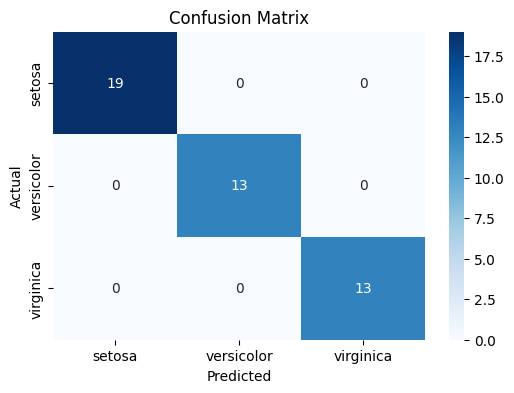

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Q36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy?

In [24]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split the data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define base estimators
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]

# Create the Stacking Classifier with Logistic Regression as the final estimator
stack_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=1000, random_state=42))
stack_clf.fit(X_train, y_train)
y_pred_stack = stack_clf.predict(X_test)
accuracy_stack = accuracy_score(y_test, y_pred_stack)

# Train individual base classifiers for comparison
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
accuracy_dt = accuracy_score(y_test, dt_clf.predict(X_test))

svm_clf = SVC(probability=True, random_state=42)
svm_clf.fit(X_train, y_train)
accuracy_svm = accuracy_score(y_test, svm_clf.predict(X_test))

lr_clf = LogisticRegression(max_iter=1000, random_state=42)
lr_clf.fit(X_train, y_train)
accuracy_lr = accuracy_score(y_test, lr_clf.predict(X_test))

print("Stacking Classifier Accuracy: {:.4f}".format(accuracy_stack))
print("Decision Tree Classifier Accuracy: {:.4f}".format(accuracy_dt))
print("SVM Classifier Accuracy: {:.4f}".format(accuracy_svm))
print("Logistic Regression Accuracy: {:.4f}".format(accuracy_lr))


Stacking Classifier Accuracy: 1.0000
Decision Tree Classifier Accuracy: 1.0000
SVM Classifier Accuracy: 1.0000
Logistic Regression Accuracy: 1.0000


# Q37. Train a Random Forest Classifier and print the top 5 most important features?

In [25]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get feature importances and sort them in descending order
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]  # sorted indices (highest first)

# Create a DataFrame with feature names and their importance scores
importance_df = pd.DataFrame({
    'Feature': feature_names[indices],
    'Importance': importances[indices]
})

# Print the top 5 most important features
print("Top 5 Most Important Features:")
print(importance_df.head(5))


Top 5 Most Important Features:
                Feature  Importance
0   mean concave points    0.141934
1  worst concave points    0.127136
2            worst area    0.118217
3        mean concavity    0.080557
4          worst radius    0.077975


# Q38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score?

In [26]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

base_estimator = DecisionTreeClassifier(random_state=42)
bagging_clf = BaggingClassifier(estimator=base_estimator, n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)

y_pred = bagging_clf.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-score: {:.4f}".format(f1))


Precision: 0.9633
Recall: 0.9722
F1-score: 0.9677


# Q39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy?

max_depth: None  Accuracy: 1.0000
max_depth: 1     Accuracy: 1.0000
max_depth: 2     Accuracy: 1.0000
max_depth: 3     Accuracy: 1.0000
max_depth: 4     Accuracy: 1.0000
max_depth: 5     Accuracy: 1.0000
max_depth: 6     Accuracy: 1.0000
max_depth: 7     Accuracy: 1.0000
max_depth: 8     Accuracy: 1.0000
max_depth: 9     Accuracy: 1.0000
max_depth: 10    Accuracy: 1.0000


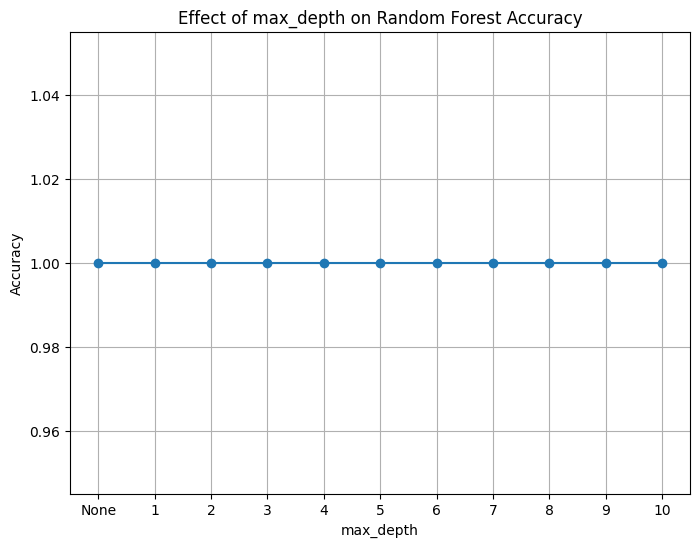

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a list of max_depth values to test (including None which means no limit)
max_depth_values = [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracies = []

for depth in max_depth_values:
    clf = RandomForestClassifier(max_depth=depth, n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print("max_depth: {:<4}  Accuracy: {:.4f}".format(str(depth), acc))

# Plot the effect of max_depth on test accuracy
plt.figure(figsize=(8, 6))
plt.plot([str(md) for md in max_depth_values], accuracies, marker='o')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Effect of max_depth on Random Forest Accuracy")
plt.grid(True)
plt.show()


# Q40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance?

In [28]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
data = load_diabetes()
X, y = data.data, data.target

# Split the dataset (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Bagging Regressor with Decision Tree as the base estimator
bag_dt = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),
    n_estimators=50,
    random_state=42
)
bag_dt.fit(X_train, y_train)
y_pred_dt = bag_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Bagging Regressor with KNeighbors as the base estimator
bag_knn = BaggingRegressor(
    estimator=KNeighborsRegressor(),
    n_estimators=50,
    random_state=42
)
bag_knn.fit(X_train, y_train)
y_pred_knn = bag_knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Compare performance
print("Bagging Regressor with Decision Tree as base estimator:")
print("  Mean Squared Error: {:.4f}".format(mse_dt))
print("  R² Score: {:.4f}".format(r2_dt))

print("\nBagging Regressor with KNeighbors as base estimator:")
print("  Mean Squared Error: {:.4f}".format(mse_knn))
print("  R² Score: {:.4f}".format(r2_knn))


Bagging Regressor with Decision Tree as base estimator:
  Mean Squared Error: 2987.0074
  R² Score: 0.4467

Bagging Regressor with KNeighbors as base estimator:
  Mean Squared Error: 3140.1861
  R² Score: 0.4183


# Q41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score?

In [29]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Load the breast cancer dataset (binary classification)
data = load_breast_cancer()
X, y = data.data, data.target

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict class probabilities for the test set and extract the probability for the positive class
y_proba = clf.predict_proba(X_test)[:, 1]

# Evaluate model performance using ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score: {:.4f}".format(roc_auc))


ROC-AUC Score: 0.9968


# Q42. Train a Bagging Classifier and evaluate its performance using cross-validatio?

In [30]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Create a Bagging Classifier with a Decision Tree as the base estimator
clf = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                        n_estimators=50,
                        random_state=42)

# Evaluate performance using 5-fold cross-validation (accuracy as the metric)
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

print("Cross-validation Accuracy Scores:", scores)
print("Mean Accuracy: {:.4f}".format(scores.mean()))
print("Standard Deviation: {:.4f}".format(scores.std()))


Cross-validation Accuracy Scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean Accuracy: 0.9667
Standard Deviation: 0.0211


# Q43. Train a Random Forest Classifier and plot the Precision-Recall curve?

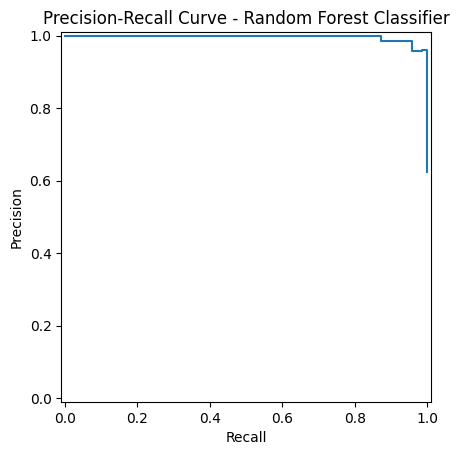

In [31]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_scores = rf_clf.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_scores)

disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve - Random Forest Classifier")
plt.show()


# Q44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy?

In [32]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define base estimators for stacking
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]

# Define the Stacking Classifier with Logistic Regression as the meta-estimator
stack_clf = StackingClassifier(estimators=estimators,
                               final_estimator=LogisticRegression(max_iter=1000, random_state=42))
stack_clf.fit(X_train, y_train)
y_pred_stack = stack_clf.predict(X_test)
accuracy_stack = accuracy_score(y_test, y_pred_stack)

# Train individual models for comparison
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
accuracy_rf = accuracy_score(y_test, rf_clf.predict(X_test))

lr_clf = LogisticRegression(max_iter=1000, random_state=42)
lr_clf.fit(X_train, y_train)
accuracy_lr = accuracy_score(y_test, lr_clf.predict(X_test))

print("Stacking Classifier Accuracy: {:.4f}".format(accuracy_stack))
print("Random Forest Classifier Accuracy: {:.4f}".format(accuracy_rf))
print("Logistic Regression Accuracy: {:.4f}".format(accuracy_lr))


Stacking Classifier Accuracy: 1.0000
Random Forest Classifier Accuracy: 1.0000
Logistic Regression Accuracy: 1.0000


# Q45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

max_samples = 0.5 --> MSE: 2826.9423, R²: 0.4763
max_samples = 0.7 --> MSE: 2797.2247, R²: 0.4818
max_samples = 1.0 --> MSE: 2987.0074, R²: 0.4467


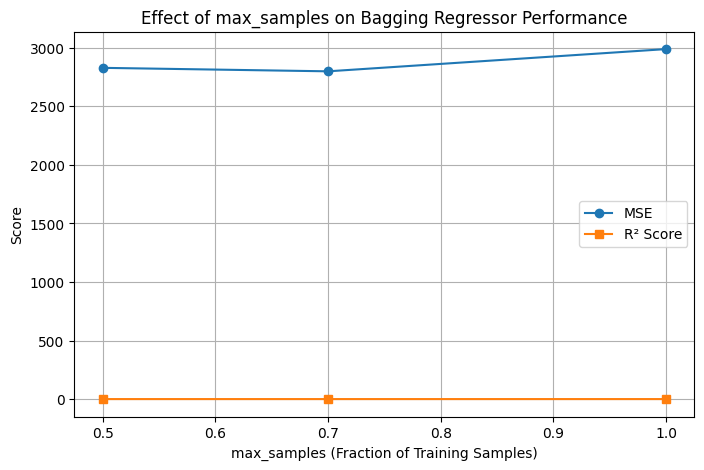

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data = load_diabetes()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
max_samples_values = [0.5, 0.7, 1.0]
mse_scores = []
r2_scores = []
for max_samples in max_samples_values:
    bag_reg = BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42),
                               n_estimators=50,
                               max_samples=max_samples,
                               bootstrap=True,
                               random_state=42)
    bag_reg.fit(X_train, y_train)
    y_pred = bag_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_scores.append(mse)
    r2_scores.append(r2)
    print("max_samples = {} --> MSE: {:.4f}, R²: {:.4f}".format(max_samples, mse, r2))
plt.figure(figsize=(8, 5))
plt.plot(max_samples_values, mse_scores, marker="o", label="MSE")
plt.plot(max_samples_values, r2_scores, marker="s", label="R² Score")
plt.xlabel("max_samples (Fraction of Training Samples)")
plt.ylabel("Score")
plt.title("Effect of max_samples on Bagging Regressor Performance")
plt.legend()
plt.grid(True)
plt.show()
